# Timeseries Notebook
This notebook will be based on the work of https://otexts.com/fpp3/ and try to emulate the same results with python code rather than R. 

In [109]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

def get_electricity_date():
    api_key = 'faab531103a040a372757a413b807938'
    params = {
        'api_key': api_key,
        'series_id': "ELEC.PRICE.CA-RES.M" 
    }
    url = "http://api.eia.gov/series/"
    r = requests.get(url, params = params)
    dat = r.json()
    df = pd.DataFrame(dat['series'][0]['data'], columns = ['date', 'price'])
    df['date'] = pd.to_datetime(df['date'], format = "%Y%m")
    return df


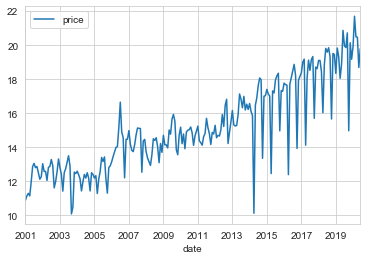

In [116]:
df = get_electricity_date()
df = df.set_index('date')
df.plot()
plt.show()

# Exploring Seasonality
1. Seasonal Plot
2. Seasonal Subseries Monthly Plot
3. Seasonal Monthly Plot
### Analysis
In 1, it appears that there is seasonality. Prices drop in April and then rise up during the summer. The prices also drop during October. <br/>
In 2, it is clear that April & October have a significant decrease around 2014, while the earlier months did not have that significant dip. <br/>
In 3, we can compare the upward trend in a group format. The stand out months are April and October which have been visible in the other forms of graphs as well.  

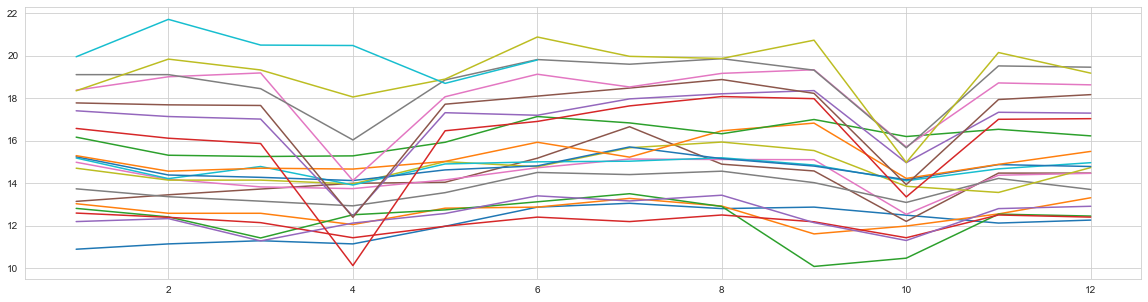

In [103]:
def get_plot_by_years(df, x_col, y_col):
    """df: must have the index set to the date value."""
    pv = pd.pivot_table(df, index=df.index.month, columns=df.index.year,
                    values='price')
    # Plot
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(pv)

# Can see the trend
get_plot_by_years(df, 'date', 'price')

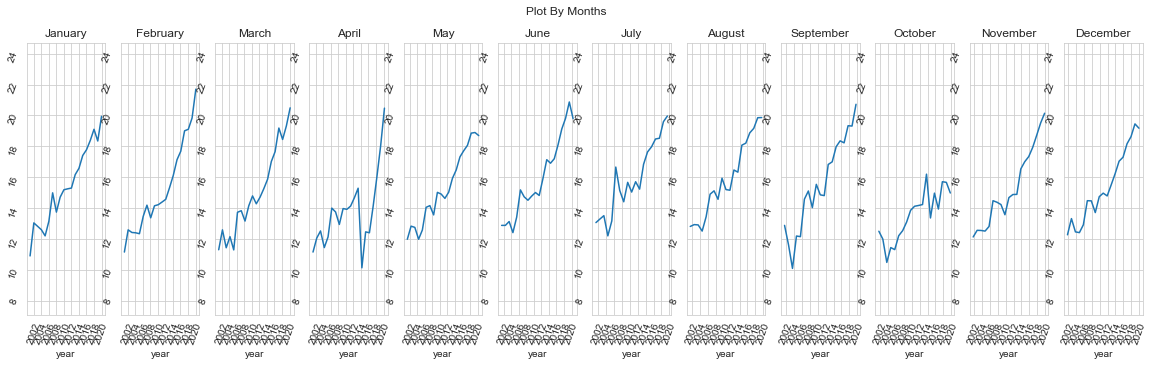

In [104]:
def get_subplot_by_month(df, y_col):
    """df: must have the index set to the date value."""
    # https://medium.com/@rayheberer/generating-matplotlib-subplots-programmatically-cc234629b648
    fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(20,5))
    fig.suptitle('Plot By Months')
    for ax, month in zip(axes.flatten(), range(1,13)):
        ax.plot(df.loc[df.index.month==month, y_col])
        ax.tick_params(labelrotation=70)
        ax.set_ylim(df[y_col].min()-3, df[y_col].max()+3)
        ax.set(title=calendar.month_name[month], xlabel='year')
        
        
def get_subplot_by_month_sns(df, x_col, y_col):
    """df: must have the index set to the date value."""
    # https://medium.com/@rayheberer/generating-matplotlib-subplots-programmatically-cc234629b648
    fig, axes = plt.subplots(nrows=1, ncols=12, figsize =(20,5))
    fig.suptitle('Plot By Months')
    for ax, month in zip(axes.flatten(), range(1,13)):
        sns.lineplot(x=x_col, y=y_col, data=df.loc[df.index.month==month].reset_index(), ax=ax)
        ax.tick_params(labelrotation=70)
        ax.set_ylim(df[y_col].min()-3, df[y_col].max()+3)
        ax.set(title=calendar.month_name[month], xlabel='year')
        
# Both options work
get_subplot_by_month(df, 'price')
# get_subplot_by_month_sns(df, 'date', 'price')

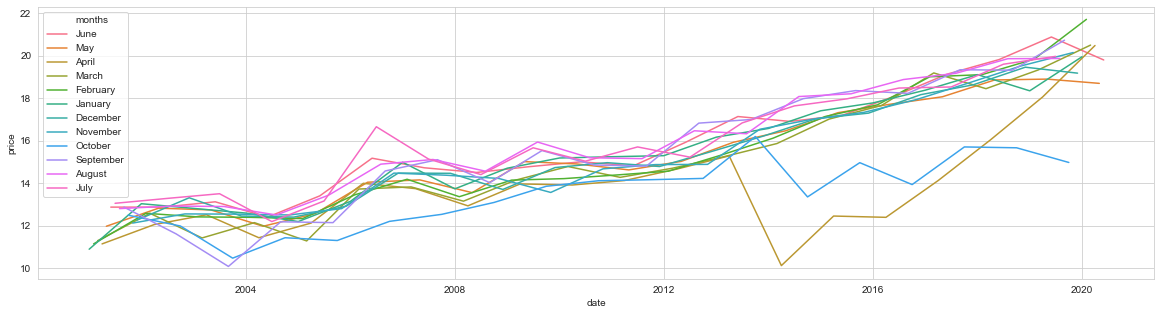

In [79]:
def get_plot_by_months(df, x_col, y_col):
    """df: must have the index set to the date value."""
    df['months'] = [calendar.month_name[ii] for ii in df.index.month]
    df = df.reset_index()
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.lineplot(x = x_col, y = y_col, data = df, hue = 'months')
    
# Compare the upward trend in a group format. The stand out months are April and October. 
get_plot_by_months(df, 'date', 'price')

# Timeseries Decomposition
### Exploring Additive Decomposition
$$y_t = S_t + T_t + R_t,$$ where $y_t$ is the data, $S_t$ is the seasonal component, 
$T_t$ is the trend-cycle component, and $R_t$ is the remainder component, all at period $t$.
#### When to Use: 
The additive decomposition is the most appropriate if the magnitude of the seasonal fluctuations, or the variation around the trend-cycle, does not vary with the level of the time series. 

Think if the variance of the plot is fixed, e.g. amplitude is bounded for entire plot even though may have an upward trend. https://online.stat.psu.edu/stat510/lesson/5/5.1#:~:text=The%20additive%20model%20is%20useful,seasonal%20variation%20increases%20over%20time.


### Exploring Additive Decomposition
$$y_t = S_t \times T_t \times R_t$$ 
#### When to Use: 
When the variation in the seasonal pattern, or the variation around the trend-cycle, appears to be proportional to the level of the time series, then a multiplicative decomposition is more appropriate. Multiplicative decompositions are common with economic time series.

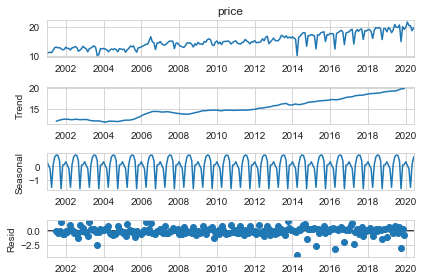

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
df.sort_index(ascending = True, inplace = True)
result = seasonal_decompose(df['price'], model='additive')
result.plot()
plt.show()

,price
date,
2020-06-01,19.79
2020-05-01,18.69
2020-04-01,20.47
2020-03-01,20.49
2020-02-01,21.70
...,...
2001-05-01,11.97
2001-04-01,11.14
2001-03-01,11.29
